In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [30]:
img_load = ImageDataGenerator(rescale = 1.0 / 255)
train = img_load.flow_from_directory('/kaggle/input/cat-and-dog/training_set/training_set/', target_size = (256, 256),
                                    batch_size = 32, color_mode = 'rgb', class_mode = 'binary')
test = img_load.flow_from_directory('/kaggle/input/cat-and-dog/test_set/test_set/', target_size = (256, 256),
                                    batch_size = 32, color_mode = 'rgb', class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


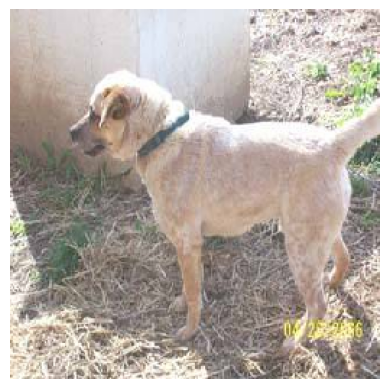

In [31]:
## Create CNN
images, labels = next(train) 
plt.imshow(images[3])
plt.axis('off')
plt.show()

In [32]:
images[3].shape

(256, 256, 3)

In [33]:
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = 'adam', metrics = 'accuracy')

In [34]:
history = model.fit(train, epochs = 1)

251/251 [==============================] - 362s 1s/step - loss: 0.6806 - accuracy: 0.5655


In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [36]:
model.evaluate(test)

64/64 [==============================] - 24s 379ms/step - loss: 0.6547 - accuracy: 0.6312


[0.6546638011932373, 0.631240725517273]

<Axes: >

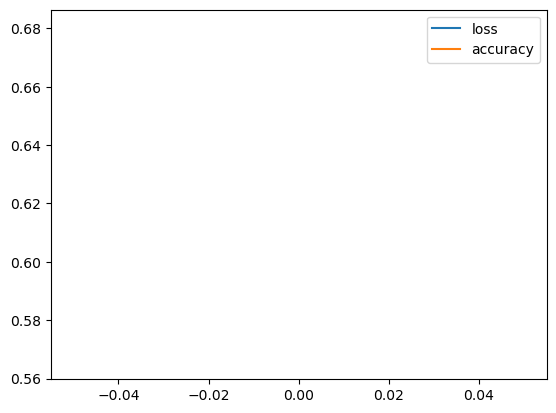

In [37]:
loss = pd.DataFrame(history.history)  # şekil çıkmadı çünkü epoch = 1 di.
loss.plot()

In [38]:
loss

,loss,accuracy
0,0.680645,0.565522


In [39]:
test.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
test.class_indices

{'cats': 0, 'dogs': 1}

labels_name = ['cats','dogs']
plt.figure(figsize=(14, 30))
for i in range(4) :
    pred = model.predict(test[i][0])
    for j in range(len(pred)):
        plt.subplot(8, 5, (10 * i) + j+1)
        plt.imshow(test[i][0][j])
        
        if pred[j] < 0.5 :
            labels_pred = 0

        else :
            labels_pred = 1
            
        if labels_pred == test.labels[(10 * i) + j] :
            plt.setp(plt.title(labels_name[labels_pred]), color = 'g')
        else :
            plt.setp(plt.title(labels_name[labels_pred]), color = 'r')

1/1 [==============================] - 0s 374ms/step


ValueError: num must be an integer with 1 <= num <= 40, not 41

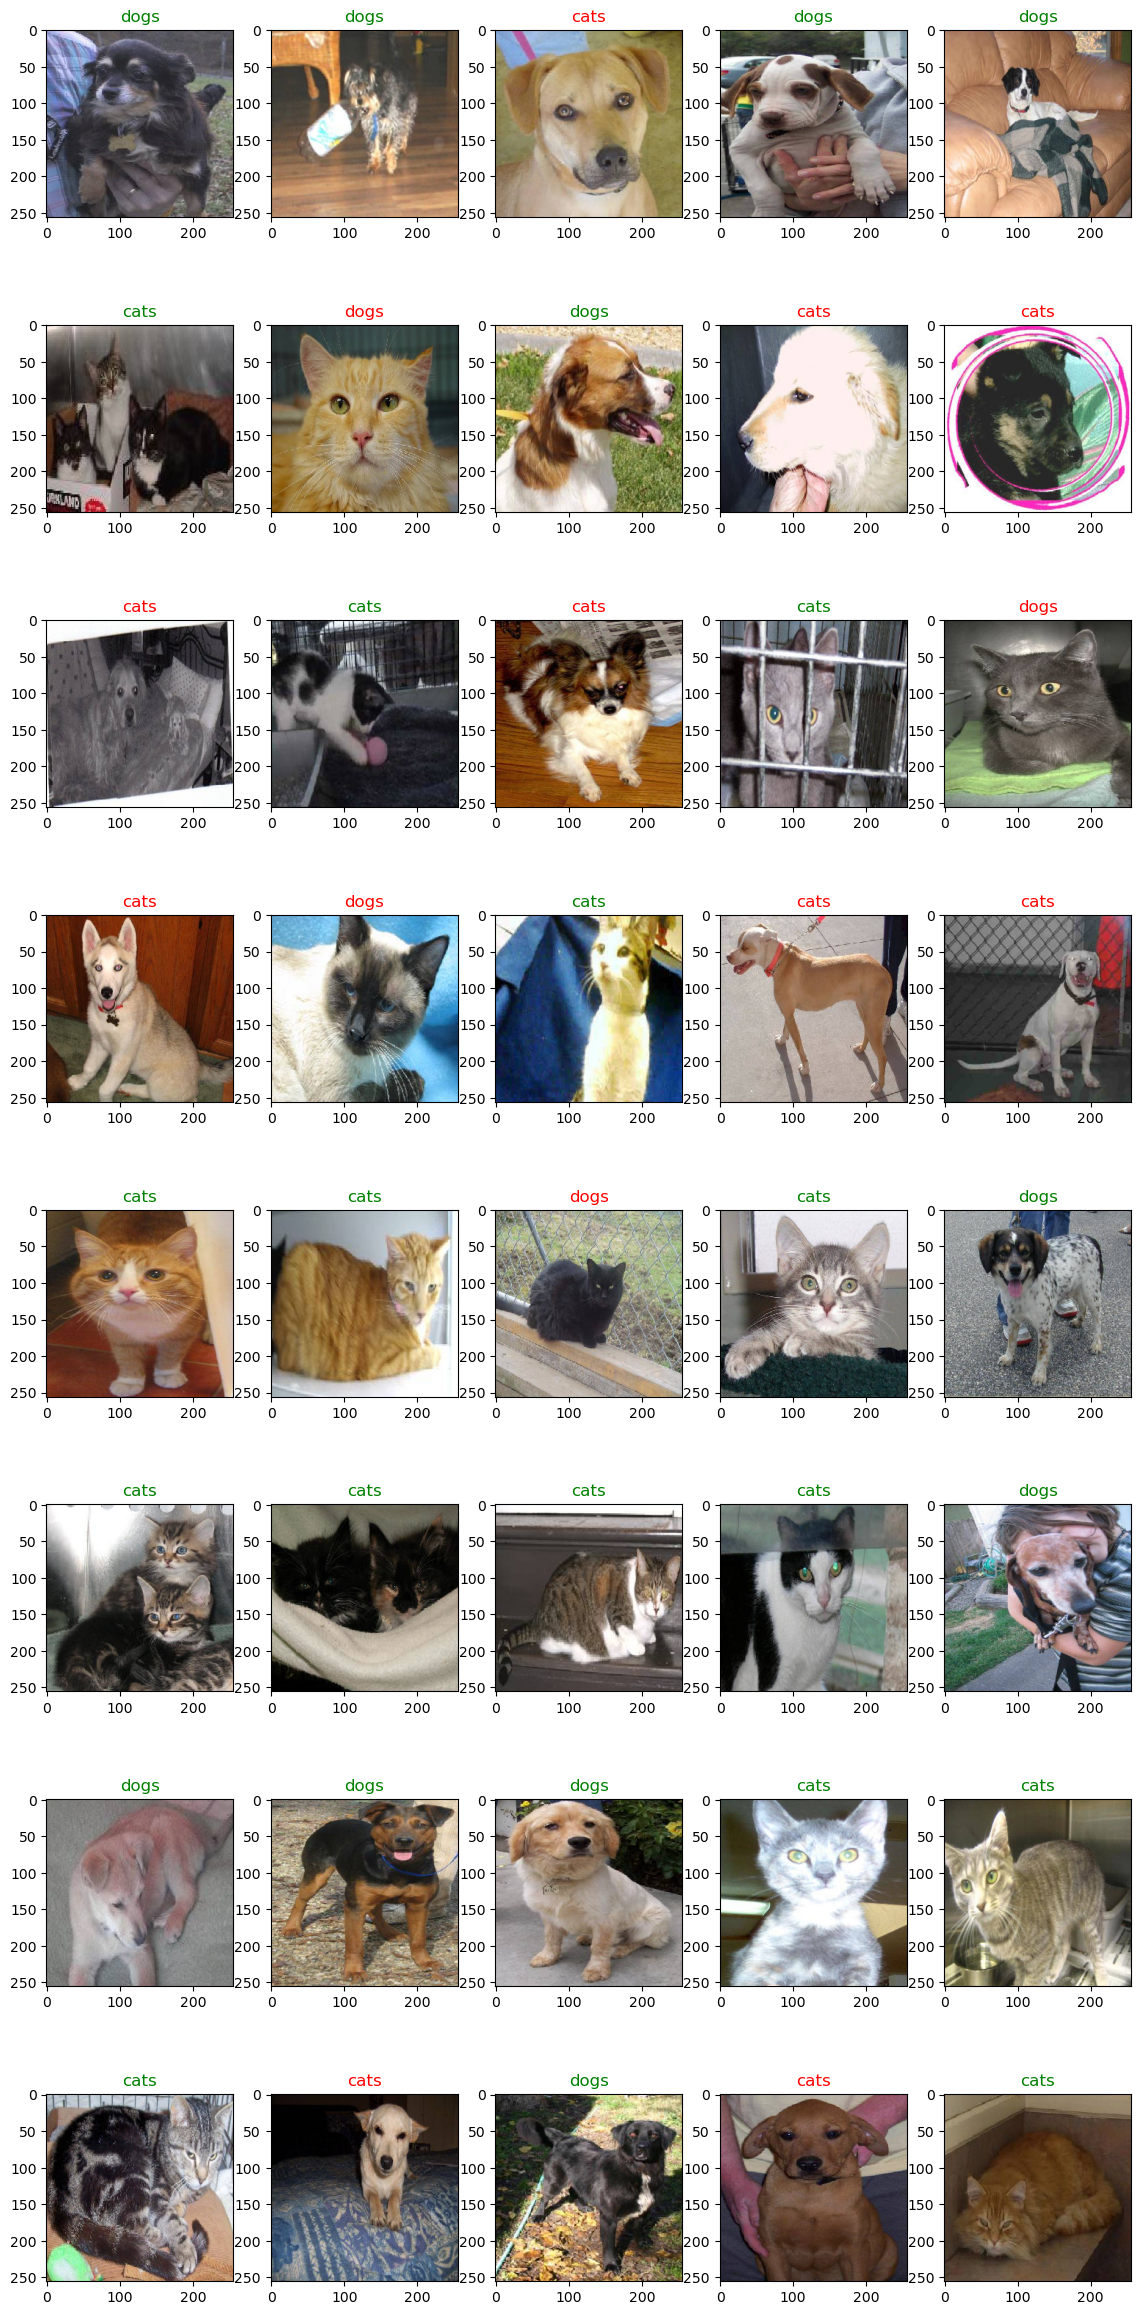

In [45]:
labels_name = ['cats', 'dogs']
plt.figure(figsize=(14, 30))
for i in range(4):
    pred = model.predict(test[i][0])
    for j in range(len(pred)):
        plt.subplot(8, 5, (10 * i) + j + 1)
        plt.imshow(test[i][0][j])
        
        if pred[j] < 0.5:
            labels_pred = 0
        else:
            labels_pred = 1
            
        if labels_pred == test[i][1][j]:
            plt.setp(plt.title(labels_name[labels_pred]), color='g')
        else:
            plt.setp(plt.title(labels_name[labels_pred]), color='r')
            
            
## for i in range(4): döngüsü, 4 adet örnek için tekrarlanır. Burada test veri setinin her bir öğesini (örneği) işlemek için kullanılır.
## pred = model.predict(test[i][0]) kodu, modelin test veri setinin giriş verilerine (test[i][0]) dayanarak tahmin yapmasını sağlar. pred değişkeni, tahmin edilen sonuçları içeren bir dizi veya tensördür.
## for j in range(len(pred)):, her bir örnek için tahmin edilen sonuçları (pred) döngüye alır. 
## plt.subplot(8, 5, (10 * i) + j + 1) kodu, 8x5'lik bir alt çizim (subplot) düzeni oluşturur. (10 * i) + j + 1 ifadesi, her bir alt çizimi tek bir sayıya dönüştürmek için kullanılır.
## plt.imshow(test[i][0][j]) kodu, test veri setinin i numaralı örneğinin j numaralı görüntüsünü çizer.
## if pred[j] < 0.5: bloğu, tahmin değerini kontrol eder. Eğer tahmin değeri 0.5'ten küçükse, labels_pred değişkenine 0 değeri atanır (ilk sınıf). Aksi takdirde, 1 değeri atanır (ikinci sınıf).
## if labels_pred == test[i][1][j]: bloğu, tahmin edilen sınıfı (labels_pred) gerçek etiketle (test[i][1][j]) karşılaştırır. Eğer tahmin edilen sınıf gerçek etikete eşitse, çıktı başlığı (title) yeşil renkte ayarlanır. Aksi takdirde, çıktı başlığı kırmızı renkte ayarlanır.

In [46]:
tahmin = model.predict_generator(test) > 0.5

In [49]:
accuracy_score(tahmin, test.labels) * 100  ## test kumesine gore %48 dogruyuz.

48.69006426099852